# ANALISIS SENTIMEN TERHADAP KEBIJAKAN FULL DAY SCHOOL DENGAN METODE SUPPORT VECTOR MACHINE (SVM)
Aplikasi ini menggunakan methode SVM. ada pun library yang harus digunakan antara lainnya :  
1. Install pandas: pip install pandas
2. Install numpy: pip install numpy
3. Install matplotlib: pip install matplotlib
4. Install openpyxl: pip install openpyxl
5. Install string: pip install string
6. Install re: pip install re
7. Install nltk: pip install nltk
8. Install swifter: pip install swifter
9. Install deep_translator: pip install deep-translator


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import string
import re #regex library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
import swifter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from deep_translator import GoogleTranslator
import time
from sklearn.svm import SVC

# TAHAP - PERISAPAAN DATA LATIH

In [36]:
data = pd.read_excel('assets/data_latih.xlsx')
df=pd.DataFrame(data[['tweet']])

df.to_excel("output/processing/tweet.xlsx", index=False)

df

,tweet
0,"Udah 2022, SMA saya juga ga full day, dan tete..."
1,Saya sampai demam karena lamanya sekolah dan p...
2,"Halo Haikal, saya dari masa depan tepatnya tah..."
3,Gak bisa nonton anime eek
4,Yang aku suka adalah ko contohin untuk nyari...
...,...
10123,Gua kelas 9 (3 smp) menurut gua sih sekolah fu...
10124,kalau full day nya versi kaya ko sih saya se...
10125,bisa sih full day asal banyaknya istirahat
10126,kalaw saya sekolah agam islam jadi apa termasu...


# TAHAP - PROCESSING DATA

In [37]:
import re
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# Fungsi untuk memeriksa dan mengunduh NLTK data jika belum ada
def check_nltk_data():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')

    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')

# Memeriksa dan mengunduh data yang dibutuhkan
check_nltk_data()

# Baca data dari Excel
df = pd.read_excel('output/processing/tweet.xlsx')

# ======================== PROSES UNTUK CLEANING DATA ============================

def remove_tweet_special(text):
    if not isinstance(text, str):
        return ""  # Jika bukan string, kembalikan data kosong
    
    # Hilangkan tab, baris baru, dan karakter backslash
    text = text.replace('\t', " ").replace('\n', " ").replace('\\', " ").replace("-", " ").replace(",", " ").replace(".", " ")
    
    # Hilangkan karakter non-ASCII (emotikon, karakter Cina, dll.)
    text = text.encode('ascii', 'replace').decode('ascii')
    
    # Hilangkan mention, link, dan hashtag
    text = re.sub(r'[@#][A-Za-z0-9]+|https?://\S+', " ", text)
    
    # Hilangkan spasi berlebih
    text = ' '.join(text.split())
    
    return text

def remove_html_tags(text):
    text = text.replace("<br>", " ").replace("<br/>", " ").replace("<p>", " ").replace("</p>", " ").replace("<h1>", " ").replace("</h1>", " ").replace("<h2>"," ").replace("<h3>"," ").replace("<h4>"," ").replace("href", " ")
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    clean_text = ' '.join(clean_text.split())
    return clean_text

def remove_number(text):
    return re.sub(r"\d+", "", text)

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+', ' ', text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# Proses case folding
df['case folding'] = df['tweet'].str.lower()

# Terapkan fungsi pembersihan
df['data cleansing'] = df['case folding'].apply(remove_tweet_special)
df['data cleansing'] = df['data cleansing'].apply(remove_html_tags)
df['data cleansing'] = df['data cleansing'].apply(remove_number)
df['data cleansing'] = df['data cleansing'].apply(remove_punctuation)
df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_LT)
df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_multiple)
df['data cleansing'] = df['data cleansing'].apply(remove_single_char)

df.to_excel("output/processing/cleansing.xlsx", index=False)

# ======================== PROSES UNTUK TOKENIZATION DATA ============================

def tokenization(text):
    return word_tokenize(text)

df['tokenization'] = df['data cleansing'].apply(tokenization)
df.to_excel("output/processing/tokenization.xlsx", index=False)

# ======================== PROSES UNTUK NORMALISASI DATA ============================

normalized_word = pd.read_excel("assets/normalisasi.xlsx")

# Membuat kamus untuk normalisasi
normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict.get(term, term) for term in document]

df['normalized_term'] = df['tokenization'].apply(normalized_term)
df.to_excel("output/processing/normalized_term.xlsx", index=False)

# ======================== PROSES UNTUK STOPWORD DATA ============================

# Menggunakan Indonesian stopwords
list_stopwords = stopwords.words('indonesian')

# Menambahkan stopword yang dibutuhkan ke list stopwords
list_stopwords.extend([
    'full', 'day', 'nik', 'ais', 'ih', 'kuea', 'ndes', 'tk', 'arg', 'hhhh', 'wuakakak',
    'gtth', 'wowww', 'apeeee', 'Aksjsjsk', 'alaee', 'koq', 'salengpraew', 'rukkhadevata', 
    'zeon', 'vivienne', 'yaam', 'woyy', 'ykwi', 'auff', 'ue', 'hoek', 'hayo', 'chnmn', 
    'hahahah', 'haaaaaa', 'din', 'woy', 'ndeer', 'lalalala', 'wkwkwkwkwkkw', 'woyyy', 
    'dih', 'den', 'hehew', 'etdah', 'beeeuh', 'wahh', 'heheee', 'hhaaha', 'waaaaa', 
    'oakilah', 'haaaahh', 'huft', 'ai', 'et', 'acha', 'hokyahokya', 'hahahihi', 'yl', 
    'wihh', 'hahahaa', 'hhhh', 'def', 'ayom', 'ser', 'duh', 'heuheueheu', 'huwaaaaaa', 
    'yalah', 'mww', 'cekabia', 'dikatara', 'angganara', 'krtsk', 'woee', 'ndi', 'ohh', 
    'www', 'aee', 'huaaaa', 'gn', 'hahahah', 'nd', 'ema', 'ceratops', 'pasuk', 'ygy', 
    'repp', 'gais', 'hadehhh', 'walah', 'hahah', 'paa', 'awkwkwk', 'wkwkk', 'wkwkw', 
    'wkwkwkwkwkwah', 'haikal', 'wkwkwkw', 'baceprot', 'sksksk', 'heheh', 'brooo', 
    'dbd', 'aeee', 'weeeh', 'wehh', 'milta', 'hsnah', 'swsg', 'hemm', 'xda', 'yara', 
    'ohh', 'heh', 'kle', 'acy', 'hayooo', 'hahahahaha', 'balablablabla', 'lai', 'loj', 
    'itine', 'heehehe', 'kwkwk', 'kwkwkwkwwkwk', 'waaa', 'demending', 'pali', 'eeh', 
    'dlsb', 'cooooy', 'hehehehe', 'adjem', 'aih', 'syar', 'wkwkk', 'aowkwkwk', 'walah', 
    'euy', 'der', 'hahaa', 'hesteg', 'hmmmmtar', 'gtideologi', 'ab', 'owkwkwkwk', 'dncw', 
    'sloga', 'jo', 'jengjenggg', 'anuanu', 'caw', 'ehehheheh', 'hlaa', 'hahahihi', 
    'ckckckck', 'sich', 'pakin', 'mmarkpkk', 'ponponpon', 'kyary', 'pamyu', 'laaahhh', 
    'cp', 'duhhh', 'eno', 'lise', 'bi', 'ieu', 'poho', 'boga', 'imah', 'keur', 'ulin', 
    'kwkwkw', 'ehheh', 'gryli', 'oalah', 'prekk', 'hehh', 'cere', 'ekekekek', 'chco', 
    'nganu', 'wkwkkwkwkwkwkw', 'zell', 'awowkwkwkwk', 'kinyis', 'pus', 'yng', 'yg', 
    'yang', 'wkwoswkwo', 'wkwkwkwkwkwk', 'ahahha', 'weeeeh', 'hah', 'nuuuuuuuuuuuuuuuuuuuuuuuuuuuuu', 
    'hong', 'jay', 'haikyuu', 'nderrr', 'omtanteuwaksodara', 'ahsajkakaka', 'kwkwkwk', 
    'derrr', 'wwkwkwkw', 'hadehh', 'aaaaa', 'heeh', 'dem', 'ocaaa', 'wo', 'prenup', 
    'dihhh', 'cokk', 'imho', 'chenle', 'jsdieksisnisawikwok', 'hahahahahahaha', 'bam', 
    'yowohh', 'lau', 'boiiiii', 'gih', 'beuhhh', 'wkw', 'wkwkwkw', 'dooong', 'oalaaaa', 
    'sinoeng', 'wkekwk', 'nyai', 'cai', 'anw', 'tjuyyy', 'hanss', 'mh', 'ih', 'widihh', 
    'cy', 'eeeee', 'gi', 'luat', 'laaaaa', 'cam', 'lancau', 'tuch', 'kun', 'uhhhh', 
    'chuakssss', 'oiyaa', 'hadeuhhhh', 'wkwkwkwwk', 'hehehee', 'nk', 'sih','nih', 'lak', 
    'qwq', 'oneesan', 'eeehmmm', 'am', 'wkwk', 'hahaha','zellnya', 'ea' ,'ealah','quot'
])

# Membaca stopwords tambahan dari file
txt_stopword = pd.read_csv("assets/stopwordbahasa.txt", names=["stopwords"], header=None)
list_stopwords.extend(txt_stopword["stopwords"])

# Konversi stopwords ke set
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['stopwords'] = df['normalized_term'].apply(stopwords_removal)
df.to_excel("output/processing/stopwords.xlsx", index=False)

df.head()


/var/folders/mw/zf7hzj1d5nj9129k4nc_8cpm0000gp/T/ipykernel_8939/190367052.py:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,tweet,case folding,data cleansing,tokenization,normalized_term,stopwords
0,"Udah 2022, SMA saya juga ga full day, dan tete...","udah 2022, sma saya juga ga full day, dan tete...",udah sma saya juga ga full day dan tetep aja g...,"[udah, sma, saya, juga, ga, full, day, dan, te...","[sudah, sama, saya, juga, tidak, full, day, da...","[aja, kemajuan, aduh]"
1,Saya sampai demam karena lamanya sekolah dan p...,saya sampai demam karena lamanya sekolah dan p...,saya sampai demam karena lamanya sekolah dan p...,"[saya, sampai, demam, karena, lamanya, sekolah...","[saya, sampai, demam, karena, lama, sekolah, d...","[demam, sekolah, pelajaran]"
2,"Halo Haikal, saya dari masa depan tepatnya tah...","halo haikal, saya dari masa depan tepatnya tah...",halo haikal saya dari masa depan tepatnya tahu...,"[halo, haikal, saya, dari, masa, depan, tepatn...","[halo, haikal, saya, dari, masa, depan, tepatn...","[halo, tepatnya, sekolah, rumah, wabah, virus,..."
3,Gak bisa nonton anime eek,gak bisa nonton anime eek,gak bisa nonton anime eek,"[gak, bisa, nonton, anime, eek]","[tidak, bisa, nonton, anime, tai]","[nonton, anime, tai]"
4,Yang aku suka adalah ko contohin untuk nyari...,yang aku suka adalah ko contohin untuk nyari...,yang aku suka adalah ko contohin untuk nyari i...,"[yang, aku, suka, adalah, ko, contohin, untuk,...","[yang, aku, suka, adalah, kok, contoh, untuk, ...","[suka, contoh, mencari, info, komen]"


# TAHAP - STEMMING MENGGUNAKAN LIBRARY SASTRAWI

In [38]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    if term == 'setuju':
        return 'setuju'
    else:
        return stemmer.stem(term)

# Membuat ketentuan dari stemming
term_dict = {}
for document in df['normalized_term']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = stemmed_wrapper(term)

# Menggunakan stemming
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemmed'] = df['stopwords'].swifter.apply(get_stemmed_term)


def fit_stopwords(text):
    text= np.array(text)
    text= ' '.join(text)
    return text

df['text']=df['stemmed'].apply(lambda x: fit_stopwords(x))
df.to_excel("output/bahasa.xlsx", index=False)
df

Pandas Apply: 100%|██████████| 10128/10128 [00:00<00:00, 1085665.28it/s]


,tweet,case folding,data cleansing,tokenization,normalized_term,stopwords,stemmed,text
0,"Udah 2022, SMA saya juga ga full day, dan tete...","udah 2022, sma saya juga ga full day, dan tete...",udah sma saya juga ga full day dan tetep aja g...,"[udah, sma, saya, juga, ga, full, day, dan, te...","[sudah, sama, saya, juga, tidak, full, day, da...","[aja, kemajuan, aduh]","[aja, maju, aduh]",aja maju aduh
1,Saya sampai demam karena lamanya sekolah dan p...,saya sampai demam karena lamanya sekolah dan p...,saya sampai demam karena lamanya sekolah dan p...,"[saya, sampai, demam, karena, lamanya, sekolah...","[saya, sampai, demam, karena, lama, sekolah, d...","[demam, sekolah, pelajaran]","[demam, sekolah, ajar]",demam sekolah ajar
2,"Halo Haikal, saya dari masa depan tepatnya tah...","halo haikal, saya dari masa depan tepatnya tah...",halo haikal saya dari masa depan tepatnya tahu...,"[halo, haikal, saya, dari, masa, depan, tepatn...","[halo, haikal, saya, dari, masa, depan, tepatn...","[halo, tepatnya, sekolah, rumah, wabah, virus,...","[halo, tepat, sekolah, rumah, wabah, virus, tu...",halo tepat sekolah rumah wabah virus tular
3,Gak bisa nonton anime eek,gak bisa nonton anime eek,gak bisa nonton anime eek,"[gak, bisa, nonton, anime, eek]","[tidak, bisa, nonton, anime, tai]","[nonton, anime, tai]","[nonton, anime, tai]",nonton anime tai
4,Yang aku suka adalah ko contohin untuk nyari...,yang aku suka adalah ko contohin untuk nyari...,yang aku suka adalah ko contohin untuk nyari i...,"[yang, aku, suka, adalah, ko, contohin, untuk,...","[yang, aku, suka, adalah, kok, contoh, untuk, ...","[suka, contoh, mencari, info, komen]","[suka, contoh, cari, info, komen]",suka contoh cari info komen
...,...,...,...,...,...,...,...,...
10123,Gua kelas 9 (3 smp) menurut gua sih sekolah fu...,gua kelas 9 (3 smp) menurut gua sih sekolah fu...,gua kelas smp menurut gua sih sekolah full day...,"[gua, kelas, smp, menurut, gua, sih, sekolah, ...","[aku, kelas, sampai, menurut, aku, sih, sekola...","[kelas, sekolah]","[kelas, sekolah]",kelas sekolah
10124,kalau full day nya versi kaya ko sih saya se...,kalau full day nya versi kaya ko sih saya se...,kalau full day nya versi kaya ko sih saya setu...,"[kalau, full, day, nya, versi, kaya, ko, sih, ...","[kalau, full, day, nya, versi, kaya, kok, sih,...","[nya, versi, kaya, setuju, banget, sekolah, pe...","[nya, versi, kaya, setuju, banget, sekolah, di...",nya versi kaya setuju banget sekolah didik mur...
10125,bisa sih full day asal banyaknya istirahat,bisa sih full day asal banyaknya istirahat,bisa sih full day asal banyaknya istirahat,"[bisa, sih, full, day, asal, banyaknya, istira...","[bisa, sih, full, day, asal, banyaknya, istira...","[banyaknya, istirahat]","[banyak, istirahat]",banyak istirahat
10126,kalaw saya sekolah agam islam jadi apa termasu...,kalaw saya sekolah agam islam jadi apa termasu...,kalaw saya sekolah agam islam jadi apa termasu...,"[kalaw, saya, sekolah, agam, islam, jadi, apa,...","[kalaw, saya, sekolah, agama, islam, jadi, apa...","[kalaw, sekolah, agama, islam]","[kalaw, sekolah, agama, islam]",kalaw sekolah agama islam


# TAHAP - SENTIMENT ANALYSIS VADER (PELABELAN)

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nltk
import pandas as pd
from deep_translator import GoogleTranslator

# Download VADER lexicon jika belum pernah dilakukan
nltk.download('vader_lexicon')
df = pd.read_excel('output/bahasa.xlsx')

# Inisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Inisialisasi Google Translator
translator = Translator()
sentiment_data = []
sentiment_positif = []
sentiment_negatif = []
sentiment_netral = []

# Loop untuk menerjemahkan dan melakukan sentiment analysis
for index, row in df.iterrows():
    try:
        # Terjemahkan teks ke bahasa Inggris
        translated = GoogleTranslator(source='id', target='en').translate(row['text'])
        time.sleep(1)
        # Hitung sentimen menggunakan VADER
        vader = sia.polarity_scores(translated)
        sentiment = vader['compound']
       
        # Tentukan label sentimen
        if sentiment > 0:
            label = 'positif'
            df.at[index, 'Label'] = label
            sentiment_positif.append({
                'Text': row['text'],
                'Translated': translated,
                'Sentimen': sentiment,
                'Label': label
            })
        elif sentiment < 0:
            label = 'negatif'
            df.at[index, 'Label'] = label
            sentiment_negatif.append({
                'Text': row['text'],
                'Translated': translated,
                'Sentimen': sentiment,
                'Label': label
            })
        else:
            label = 'netral'
            df.at[index, 'Label'] = label
            sentiment_netral.append({
                'Text': row['text'],
                'Translated': translated,
                'Sentimen': sentiment,
                'Label': label
            })
        
        sentiment_data.append({
            'Text': row['text'],
            'Translated': translated,
            'Sentimen': sentiment,
            'Label': label
        })
    except Exception as e:
        print('index', index)

        
# Convert lists to DataFrames
df_sentiment_positif = pd.DataFrame(sentiment_positif)
df_sentiment_negatif = pd.DataFrame(sentiment_negatif)
df_sentiment_netral = pd.DataFrame(sentiment_netral)
data = pd.DataFrame(sentiment_data)

# Print the DataFrame to check results

# Menyimpan hasil ke Excel
df_sentiment_positif.to_excel("output/lexicon/lexicon_positif.xlsx", index=False)
df_sentiment_negatif.to_excel("output/lexicon/lexicon_negatif.xlsx", index=False)
df_sentiment_netral.to_excel("output/lexicon/lexicon_netral.xlsx", index=False)
data.to_excel("output/lexicon/sentiment_analysis.xlsx", index=False)

data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/galkasoft/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


index 9
index 28
index 77
index 81
index 91
index 97
index 108
index 110
index 135
index 221
index 227
index 245
index 253
index 259
index 274
index 282
index 305
index 327
index 416
index 422
index 433
index 471
index 551
index 581
index 588
index 621
index 630
index 670
index 696
index 720
index 733
index 739
index 783
index 816
index 824
index 845
index 857
index 884
index 907
index 951
index 964
index 967
index 972
index 1049
index 1056
index 1060
index 1061
index 1081
index 1137
index 1185
index 1191
index 1207
index 1231
index 1246
index 1251
index 1263
index 1324
index 1391
index 1414
index 1496
index 1504
index 1506
index 1588
index 1589
index 1591
index 1592
index 1593
index 1594
index 1599
index 1607
index 1608
index 1609
index 1610
index 1614
index 1653
index 1665
index 1666
index 1676
index 1717
index 1721
index 1729
index 1739
index 1744
index 1778
index 1787
index 1789
index 1905
index 1950
index 2002
index 2007
index 2020
index 2068
index 2071
index 2111
index 2122
index

,Text,Translated,Sentimen,Label
0,aja maju aduh,just go ahead,0.0000,netral
1,demam sekolah ajar,school fever,0.0000,netral
2,halo tepat sekolah rumah wabah virus tular,hello right home school contagious virus outbreak,-0.3400,negatif
3,nonton anime tai,watch anime tai,0.0000,netral
4,suka contoh cari info komen,like the example of looking for comment info,0.3612,positif


In [86]:
from collections import Counter

data  = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')

def top_words_sentiment(sentiment):
    # Menggabungkan semua teks dalam sentimen tertentu menjadi satu string
    all_text = ' '.join(data[data['Label'] == sentiment]['Text'])

    # Memisahkan kata-kata
    words = all_text.split()

    # Menghapus kata-kata yang hanya terdiri dari 2 huruf atau kurang, serta kata-kata yang memiliki lebih dari 8 huruf
    filtered_words = [word for word in words if len(word) > 4 and len(word) < 9]

    # Menghitung frekuensi kemunculan setiap kata
    word_counts = Counter(filtered_words)

    # Mengambil 10 kata dengan frekuensi tertinggi
    top_10_words = word_counts.most_common(10)

    # Menampilkan hasil
    print(f"10 kata yang paling sering muncul dalam sentimen {sentiment}:")
    for word, count in top_10_words:
        print(f"{word}: {count} kali")

# Memanggil fungsi untuk setiap sentimen
top_words_sentiment('negatif')
print("\n")
top_words_sentiment('positif')
print("\n")
top_words_sentiment('netral')


5 kata yang paling sering muncul dalam sentimen negatif:
sekolah: 1109 kali
pulang: 281 kali
capek: 246 kali
setuju: 233 kali
kelas: 183 kali
banget: 170 kali
kakak: 166 kali
rumah: 133 kali
stres: 131 kali
orang: 119 kali


5 kata yang paling sering muncul dalam sentimen positif:
setuju: 3327 kali
sekolah: 3219 kali
kakak: 844 kali
pulang: 611 kali
banget: 519 kali
rumah: 469 kali
kelas: 422 kali
teman: 417 kali
orang: 358 kali
libur: 247 kali


5 kata yang paling sering muncul dalam sentimen netral:
sekolah: 1150 kali
pulang: 328 kali
kakak: 325 kali
kelas: 236 kali
rumah: 91 kali
masuk: 90 kali
minggu: 80 kali
orang: 70 kali
kerja: 60 kali
atahu: 60 kali


Calculating Sentiment Analysis : Melakukan analisis sentiment pada data yang sudah di latih

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

data  = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')
# Inisialisasi objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada data pelatihan
tfidf_train = tfidf_vectorizer.fit_transform(data['Text'])

# Melakukan pembobotan TF-IDF pada data uji dengan menggunakan vocabulary yang sama dengan data pelatihan
tfidf_test = tfidf_vectorizer.transform(data['Text'])

# Tampilkan hasil pembobotan
print("Matriks TF-IDF untuk data pelatihan:")
print(tfidf_train)

print("\nMatriks TF-IDF untuk data uji:")
print(tfidf_test)


Matriks TF-IDF untuk data pelatihan:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 74702 stored elements and shape (9892, 9883)>
  Coords	Values
  (0, 135)	0.2885838687948068
  (0, 5401)	0.634500585564101
  (0, 82)	0.7170274454930122
  (1, 2211)	0.893296242847084
  (1, 7960)	0.20715289700504824
  (1, 144)	0.3988853215871694
  (2, 7960)	0.09455049707270606
  (2, 3462)	0.38736682837033015
  (2, 8958)	0.41443074696106386
  (2, 7661)	0.19169647107242793
  (2, 9516)	0.47733407740338796
  (2, 9485)	0.4569749940655452
  (2, 9267)	0.4425299945557804
  (3, 6427)	0.4079979225523647
  (3, 346)	0.5913027830298756
  (3, 8781)	0.6956282872152905
  (4, 8652)	0.345756478570687
  (4, 1811)	0.44019230629964584
  (4, 1375)	0.42969140010486845
  (4, 3839)	0.4812131270966089
  (4, 4784)	0.5200792420264604
  (5, 605)	0.4111345219749523
  (5, 669)	0.5628095020889604
  (5, 4824)	0.5896248542548309
  (5, 8056)	0.4081132201286466
  :	:
  (9888, 7960)	0.07467736710265388
  (9888, 669)	0.292033886

# TAHAP - LOGIC SVM

In [3]:

from sklearn.svm import SVC
import numpy as np
data = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')

# inisialisasi TF-IDF
vectorizer = TfidfVectorizer()

# ubah teks menjadi vektor
X = vectorizer.fit_transform(data['Translated'])

# MODEL TRAINING, SVM -------
# pada tahap ini kita akan melakukan training menggunakan algoritma SVM
# SVM digunakan jika kita memiliki data yang tidak terlalu besar, di samping itu SVM tidak membutuhkan
# sumber daya komputasi yang besar dibandingkan ANN, sehingga cocok untuk data yang tidak terlalu besar

# inisialisasi model SVM
svm = SVC()

# latih model SVM
svm.fit(X, data['Label'])

# MODEL EVALUATION -------
# pada tahap ini kita akan melakukan evaluasi model yang sudah kita latih

# prediksi label menggunakan SVM
y_pred_svm = svm.predict(X)

# hitung akurasi
accuracy_svm = np.mean(y_pred_svm == data['Label'])
# Konversi akurasi ke dalam bentuk persentase
accuracy_svm_percentage = accuracy_svm * 100

# Tampilkan hasil akurasi dalam bentuk persentase
print('============================================')
print('Akurasi SVM: {:.2f}%'.format(accuracy_svm_percentage))
print('============================================')
# print(data[['Sentimen', 'Label']])

# SAVE MODEL -------
# setelah model berhasil dilatih, kita perlu menyimpan model ke dalam file
# file yang kita simpan di sini adalah model dan vectorizer yang sudah kita latih
# model digunakan untuk melakukan prediksi atau analisis sentimen, sedangkan vectorizer digunakan untuk
# mengubah teks menjadi vektor numerik yang dapat digunakan oleh algoritma SVM


# Calculating the number of each sentiment
jumlah_negatif = sum(data['Label'] == 'negatif')
jumlah_positif = sum(data['Label'] == 'positif')
jumlah_netral = sum(data['Label'] == 'netral')
total_data = len(data)

# print("Negatif:", jumlah_negatif, ", Positif:", jumlah_positif, ", Netral:", jumlah_netral, ", Total:", total_data)

# Calculate the number of training and testing data
jumlah_data_training = int(0.8 * total_data)
jumlah_data_testing = total_data - jumlah_data_training

# Calculate the percentage of training and testing data
persentase_training = (jumlah_data_training / total_data) * 100
persentase_testing = (jumlah_data_testing / total_data) * 100

# Calculating the number of positive sentiment data used for training and testing
jumlah_positif_training = len(data[(data['Label'] == 'positif') & (data.index < jumlah_data_training)])
jumlah_positif_testing = len(data[(data['Label'] == 'positif') & (data.index >= jumlah_data_training)])

# Calculating the number of positive sentiment data used for training and testing
jumlah_netral_training = len(data[(data['Label'] == 'netral') & (data.index < jumlah_data_training)])
jumlah_netral_testing = len(data[(data['Label'] == 'netral') & (data.index >= jumlah_data_training)])

# Calculating the number of negative sentiment data used for training and testing
jumlah_negatif_training = len(data[(data['Label'] == 'negatif') & (data.index < jumlah_data_training)])
jumlah_negatif_testing = len(data[(data['Label'] == 'negatif') & (data.index >= jumlah_data_training)])

len_data = 10  # Adjust this based on your data length

print("\nPembagian Dataset")
print("-" * 100)
print("{:<{len_data}} | {:<8}| {:<{len_data}}| {:<{len_data}}".format(
    "Sentiment ", "Jumlah", f"Data Training ({persentase_training:.2f}%)",
    f"Data Testing ({persentase_testing:.2f}%)", len_data=len_data))
print("-" * 100)
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Negatif", jumlah_negatif, jumlah_negatif_training, jumlah_negatif_testing, len_data=len_data + 1))
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Netral", jumlah_netral, jumlah_netral_training, jumlah_netral_testing, len_data=len_data + 1))

print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Positif", jumlah_positif, jumlah_positif_training, jumlah_positif_testing, len_data=len_data + 1))
print("-" * 100)
# print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Netral", jumlah_netral, jumlah_data_training, jumlah_data_testing, len_data=len_data + 1))
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Total", jumlah_negatif + jumlah_positif+ jumlah_netral, jumlah_negatif_training + jumlah_positif_training+ jumlah_netral_training, jumlah_negatif_testing + jumlah_positif_testing+ jumlah_netral_testing, len_data=len_data + 1))

Akurasi SVM: 99.19%

Pembagian Dataset
----------------------------------------------------------------------------------------------------
Sentiment  | Jumlah  | Data Training (79.99%)| Data Testing (20.01%)
----------------------------------------------------------------------------------------------------
Negatif    | 1467    | 1236       | 231        
Netral     | 2515    | 2011       | 504        
Positif    | 5910    | 4666       | 1244       
----------------------------------------------------------------------------------------------------
Total      | 9892    | 7913       | 1979       


# TAHAP - WORDCLOUD

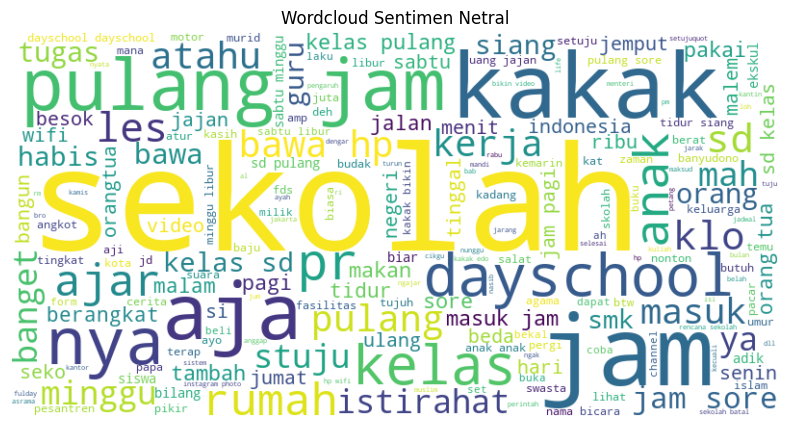

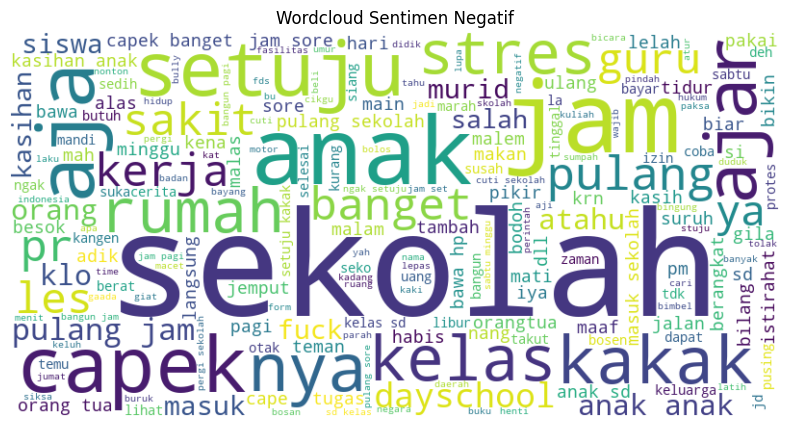

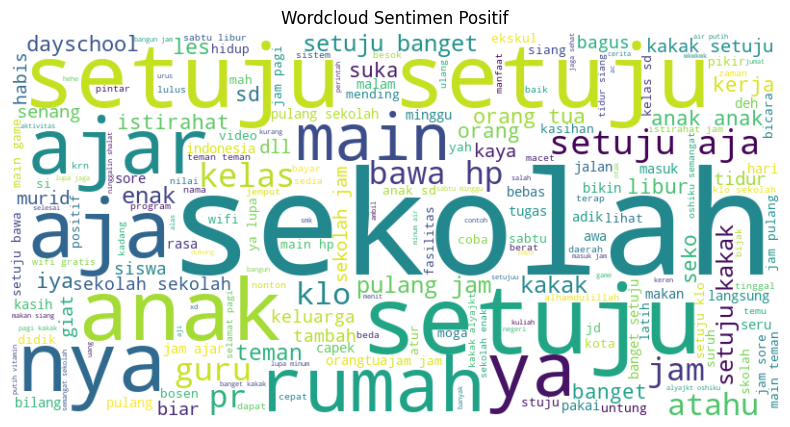

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Load the data
data = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')

# =============================== Worcloud Netral ===============================

# Filter for neutral sentiment
neutral_data = data[data['Label'] == 'netral']

# Combine all the text from the neutral sentiment rows
combined_text = ' '.join(neutral_data['Text'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)


# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Sentimen Netral')
plt.axis('off')
plt.show()

# =============================== Worcloud Negatif ===============================
negatif_data = data[data['Label'] == 'negatif']

# Combine all the text from the neutral sentiment rows
combined_text = ' '.join(negatif_data['Text'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Sentimen Negatif')
plt.axis('off')
plt.show()

# =============================== Worcloud Positif ===============================
positif_data = data[data['Label'] == 'positif']

# Combine all the text from the neutral sentiment rows
combined_text = ' '.join(positif_data['Text'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Sentimen Positif')
plt.axis('off')
plt.show()


# TAHAP - BAR CHART

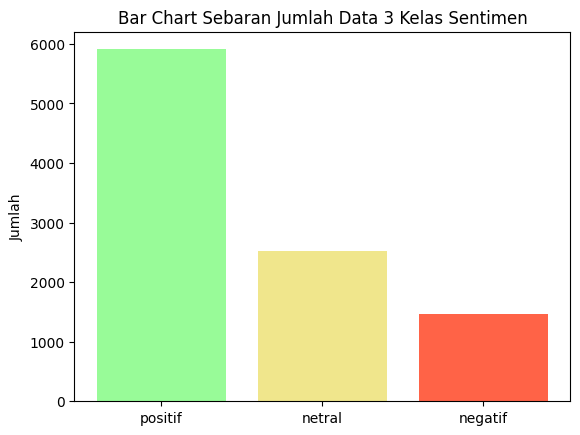

In [6]:
df = pd.read_excel("output/lexicon/sentiment_analysis.xlsx")

x_axis = ['positif', 'netral', 'negatif']
y_axis = [(sum(df['Label']=='positif')), (sum(df['Label']=='netral')), (sum(df['Label']=='negatif'))]
c = ['palegreen','khaki','tomato']
plt.bar(x_axis, y_axis, color = c)
plt.title('Bar Chart Sebaran Jumlah Data 3 Kelas Sentimen')
plt.ylabel('Jumlah')
plt.show()

# TAHAP - PIE CHART

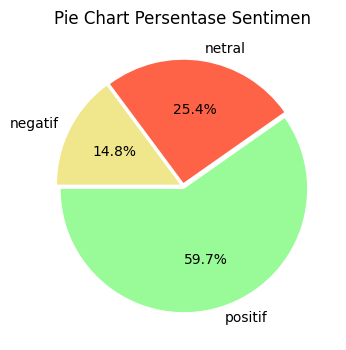

In [7]:
data = pd.read_excel("output/lexicon/sentiment_analysis.xlsx")

#Membuat PieChart
plt.figure(figsize=(8,4))
plt.title("Pie Chart Persentase Sentimen", fontsize=12)
chart = plt.pie(data.Label.value_counts(),explode=(0.025,0.025,0.025), 
            labels=data.Label.value_counts().index, 
            colors=['palegreen','tomato','khaki'],  
            autopct='%1.1f%%', startangle=180)
plt.show()

data.to_excel("output/labeled.xlsx")

# TAHAP - MATRIX CONFUSION

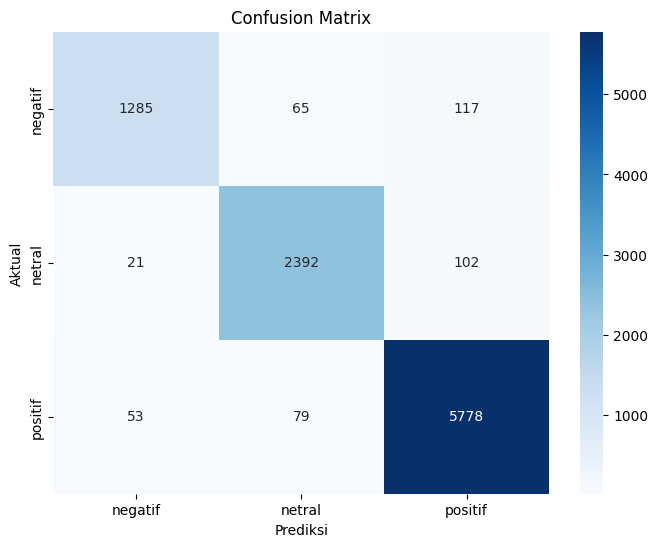

Deskripsi dari Confusion Matrix:
              precision    recall  f1-score   support

     negatif       0.95      0.88      0.91      1467
      netral       0.94      0.95      0.95      2515
     positif       0.96      0.98      0.97      5910

    accuracy                           0.96      9892
   macro avg       0.95      0.93      0.94      9892
weighted avg       0.96      0.96      0.96      9892



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')
# Menginisialisasi model SVM dengan kernel linear
svm_classifier = SVC(kernel='linear')
# Melatih model SVM menggunakan data pelatihan yang telah diboboti dengan TF-IDF dan label sentimen
svm_classifier.fit(tfidf_train, data['Label'])

# Memprediksi label sentimen pada data uji menggunakan model SVM yang telah dilatih
predictions = svm_classifier.predict(tfidf_test)
cm = confusion_matrix(data['Label'], predictions)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan deskripsi dari diagram confusion matrix
print("Deskripsi dari Confusion Matrix:")
print(classification_report(data['Label'], predictions, zero_division=0))
